[`Data Set`](#https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/?select=Test_set.xlsx)

---


In [1]:
# Importing all the necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


#### Loading dataset

In [2]:
train_set=pd.read_excel('E:\Projects\ML_Projects\myenv1\datasets\FlightPrice\Data_Train.xlsx')

In [3]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
train_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
# There are few columns with missing data which have to be removed
train_set.dropna(inplace=True)

### Exploratory data analysis

In [7]:
# From info we know that  Date_of_Journey is of object datatype. Convert it to panas daytime format by extracting date and time, dropping the actual column

train_set['Journey_Day']=pd.to_datetime(train_set['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_set['Journey_month']=pd.to_datetime(train_set['Date_of_Journey'],format='%d/%m/%Y').dt.month
train_set.drop(['Date_of_Journey'],axis=1,inplace=True)

In [8]:
# Similar to above step we drop the column Dep_Time, Arrival_Time after extracting the time
train_set['Dep_hr']=pd.to_datetime(train_set['Dep_Time']).dt.hour
train_set['Dep_min']=pd.to_datetime(train_set['Dep_Time']).dt.minute
train_set['Arival_hr']=pd.to_datetime(train_set['Arrival_Time']).dt.hour
train_set['Arival_min']=pd.to_datetime(train_set['Arrival_Time']).dt.minute
train_set.drop(['Dep_Time'],axis=1,inplace=True)
train_set.drop(['Arrival_Time'],axis=1,inplace=True)

In [9]:
train_set.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arival_hr,Arival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [10]:
# Now we have to find duration from Duration column. Make a list and split to make the data uniform in the form of x hr y min
# If after splitting only hour or minute are present, the length will be 1, we will format that in form of 0 hr y min or X  hr 0 min
duration=list(train_set['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i] 


In [11]:
duration_hr=[]
duration_min=[]
for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1])) 

In [12]:
# Adding the duration hour and minute in the original test_set and droping the duration column
train_set['Duration_hr']=duration_hr
train_set['Duration_min']=duration_min
train_set.drop(['Duration'],axis=1,inplace=True)

### Dealing with categorical Data
----
###### When data is categorical, it must be encoded to apply models. if the number of categories are less. If catgories are too much, encoding to only most relevent features. Two most popular encoding are ordinal and one hot encoding
1. Ordinal encoding - In ordinal encoding, each unique category value is assigned an integer value. Ordinal encoding transform is available in sklearn OrdinalEncoder class.
2. One hot encoding - For categorical variables where no ordinal relationship exists. It is present in Sklearn OneHotEncoder class.


In [13]:
train_set['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<AxesSubplot:xlabel='Airline', ylabel='Price'>

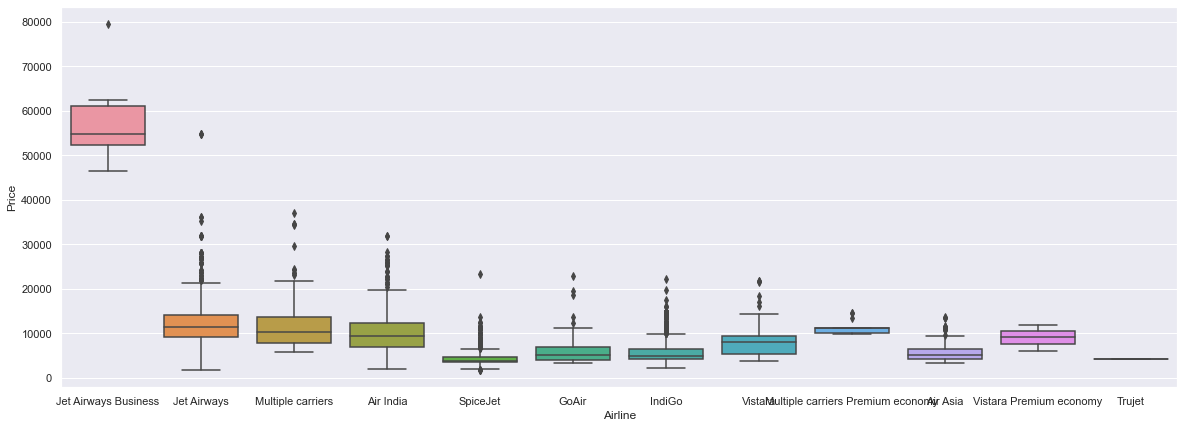

In [14]:
# Visualisation of the price of different airlines
plt.figure(figsize=(20,7))
sns.boxplot(y='Price',x='Airline',data=train_set.sort_values("Price", ascending = False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

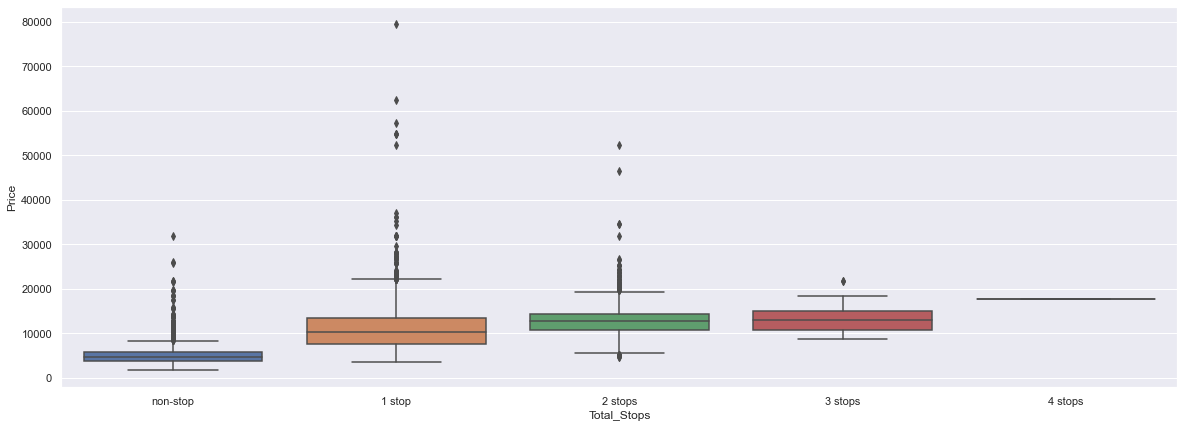

In [15]:
# It shows upon one stop, the median price is minimum
plt.figure(figsize=(20,7))
sns.boxplot(x='Total_Stops',y='Price',data=train_set.sort_values('Price'))

In [16]:
#  Performing one hot encoding for Airline(categorical) data. 
# When drop_ first is set to true, we get one less categorical variable. It decide Whether to get k-1 dummies out of k categorical levels by removing the first level.
Airline=pd.get_dummies(train_set['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [17]:
# similarly encoding source and destination categories as number of variable are 5 and 6 respectively

source=pd.get_dummies(train_set['Source'],drop_first=True)

destination=pd.get_dummies(train_set['Destination'],drop_first=True)

In [18]:
#Finding all route and count
train_set['Route'].value_counts()

DEL → BOM → COK                2376
BLR → DEL                      1552
CCU → BOM → BLR                 979
CCU → BLR                       724
BOM → HYD                       621
                               ... 
CCU → IXA → BLR                   1
BLR → HBX → BOM → AMD → DEL       1
BOM → VNS → DEL → HYD             1
BOM → GOI → HYD                   1
BOM → RPR → VTZ → HYD             1
Name: Route, Length: 128, dtype: int64

In [19]:
# Route and Total_Stops are related to each other so we drop Route. Also 8344 out of  10682 record has No info, so we drop it too
train_set.drop(['Route','Additional_Info'],axis=1,inplace=True)

In [20]:
train_set.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_month,Dep_hr,Dep_min,Arival_hr,Arival_min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [21]:
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
train_set['Total_Stops']=train_set['Total_Stops'].map(dict)

In [22]:
# Concat the Airline,source and destination encoded data with the available train set and store as final_train_set
final_train_set=pd.concat([train_set,Airline,source,destination],axis=1)

In [23]:
# Dropping the Airline,Source, Destination column as we have encoded values
final_train_set.drop(['Airline','Source','Destination'],axis=1,inplace=True)

### Test data have also to be made availble in similar format. We do not concatenate the training and test data as it might lead to data leakage which might lead to overfitting.
---


In [44]:
test_set=pd.read_excel('E:\Projects\ML_Projects\myenv1\datasets\FlightPrice\Test_set.xlsx')

In [45]:
test_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [46]:
# All same steps as above

test_set.dropna(inplace=True)

test_set['Journey_Day']=pd.to_datetime(test_set['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_set['Journey_month']=pd.to_datetime(test_set['Date_of_Journey'],format='%d/%m/%Y').dt.month
test_set.drop(['Date_of_Journey'],axis=1,inplace=True)
test_set['Dep_hr']=pd.to_datetime(test_set['Dep_Time']).dt.hour
test_set['Dep_min']=pd.to_datetime(test_set['Dep_Time']).dt.minute
test_set['Arival_hr']=pd.to_datetime(test_set['Arrival_Time']).dt.hour
test_set['Arival_min']=pd.to_datetime(test_set['Arrival_Time']).dt.minute
test_set.drop(['Dep_Time'],axis=1,inplace=True)
test_set.drop(['Arrival_Time'],axis=1,inplace=True)

duration=list(test_set['Duration'])
for i in range(len(duration)):
    if len(duration[i].split())!=2:
        if 'h' in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h "+duration[i] 
            
duration_hr=[]
duration_min=[]
for i in range(len(duration)):
    duration_hr.append(int(duration[i].split(sep = "h")[0]))
    duration_min.append(int(duration[i].split(sep = "m")[0].split()[-1])) 
    
test_set['Duration_hr']=duration_hr
test_set['Duration_min']=duration_min
test_set.drop(['Duration'],axis=1,inplace=True)    

Airline=pd.get_dummies(test_set['Airline'],drop_first=True)
source=pd.get_dummies(test_set['Source'],drop_first=True)
destination=pd.get_dummies(test_set['Destination'],drop_first=True)

test_set.drop(['Route','Additional_Info'],axis=1,inplace=True)
test_set['Total_Stops']=test_set['Total_Stops'].map(dict)

final_test_set=pd.concat([test_set,Airline,source,destination],axis=1)
final_test_set.drop(['Airline','Source','Destination'],axis=1,inplace=True)


#### Feature selection
1. Correlation Matrix with Heatmap
2. Feature Selection
3. Univariate Selection
[`Reference Article`](#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e)
----

In [50]:
final_train_set.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_month', 'Dep_hr',
       'Dep_min', 'Arival_hr', 'Arival_min', 'Duration_hr', 'Duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [61]:
# The x column has all attribue on which we have to see our corelation
x=final_train_set.loc[:,['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hr',
       'Dep_min', 'Arival_hr', 'Arival_min', 'Duration_hr', 'Duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']]
x.shape

(10682, 33)

In [60]:
# selecting the price column as y 
y=final_train_set.iloc[:,1]
y.shape

(10682,)

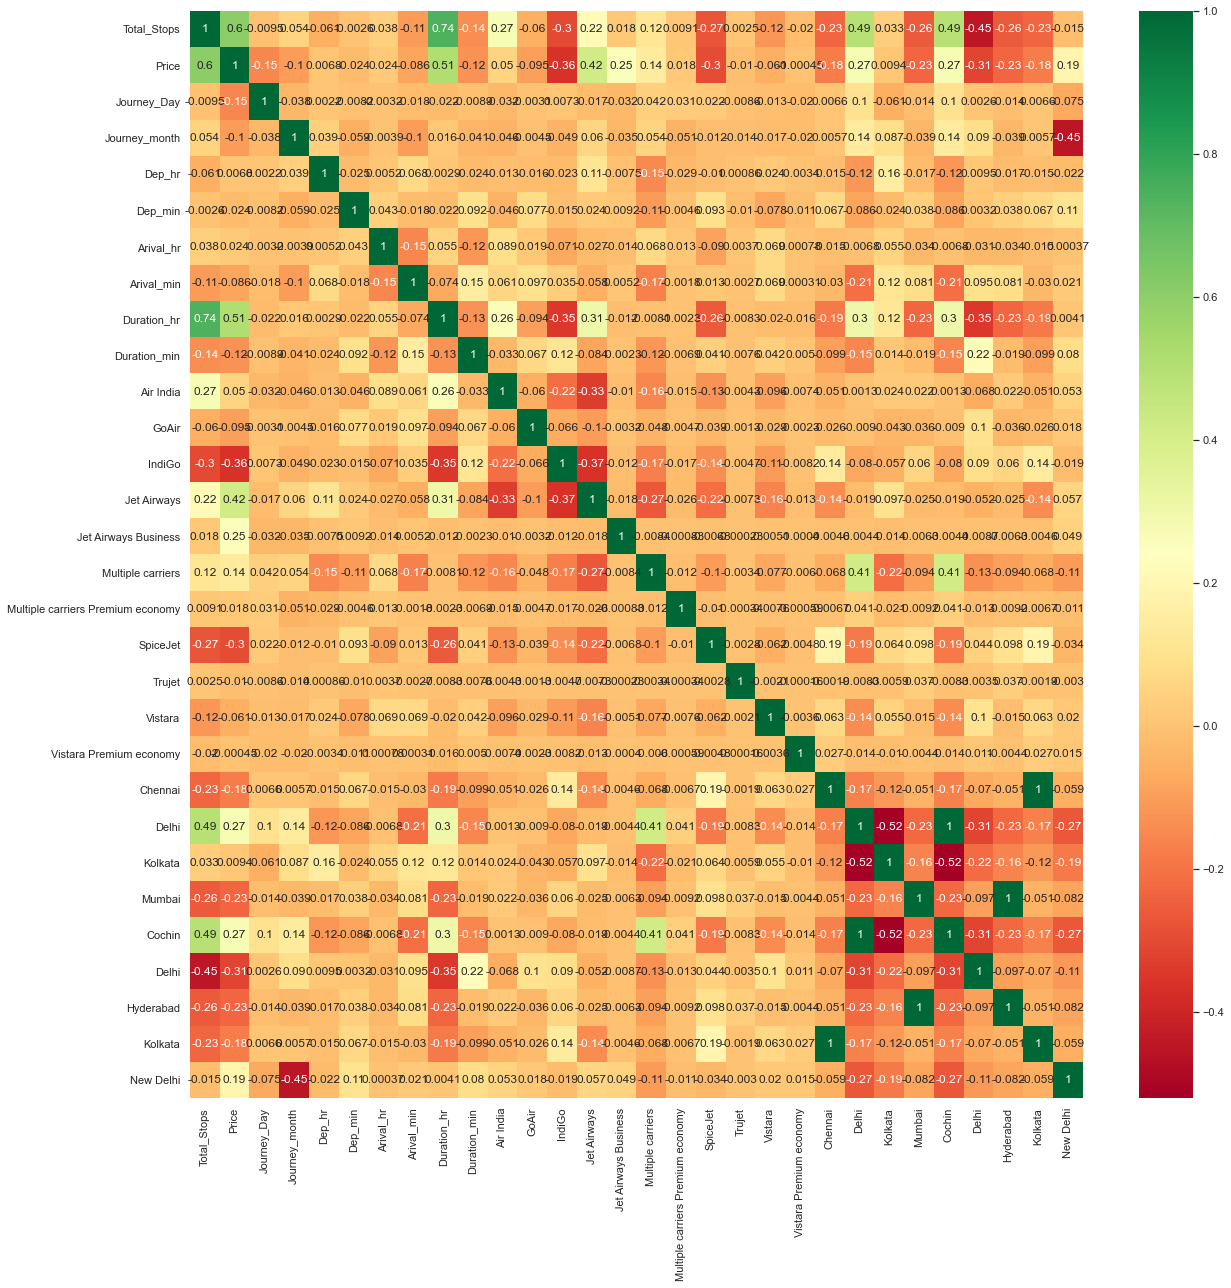

In [69]:
# HeatMap
plt.figure(figsize=(20,20))
g=sns.heatmap(final_train_set.corr(),annot=True,cmap="RdYlGn")

[2.50272109e-01 1.44963336e-01 5.25104701e-02 2.45755928e-02
 2.07991354e-02 2.73478233e-02 1.91266587e-02 1.01203205e-01
 1.80194530e-02 9.31974835e-03 1.73486870e-03 1.76765192e-02
 1.42854023e-01 6.74135491e-02 2.04374197e-02 8.70651678e-04
 2.82987030e-03 9.54357806e-05 4.99592949e-03 8.06355015e-05
 3.21361606e-04 7.95021648e-03 8.03373085e-03 1.83801387e-03
 2.66537393e-04 6.51054083e-03 3.80436295e-03 5.32961627e-03
 5.89274232e-03 6.22703365e-03 1.67855001e-03 3.64386464e-04
 2.46564725e-02]


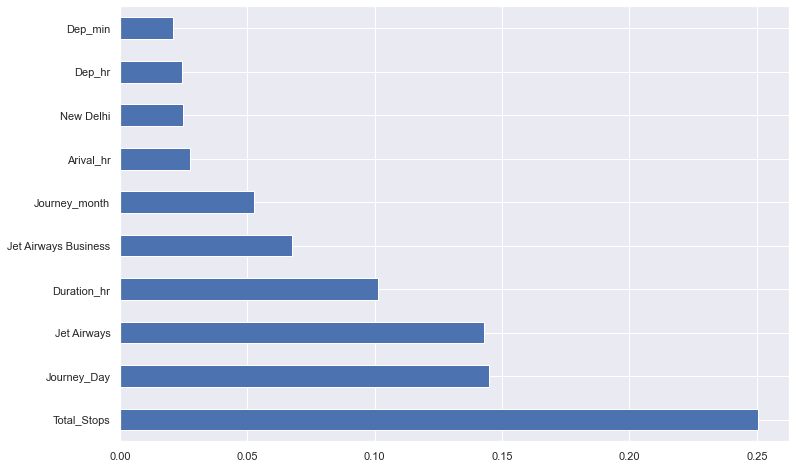

In [73]:
# Important feature using ExtraTreesRegressor
# Physcal memory exhausted using ExtrareesClassifier model . Using alternate model
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(x,y)
print(model.feature_importances_)  #use inbuilt class feature_importances of tree based regressor

#plot graph of feature importances for better visualization
plt.figure(figsize = (12,8))
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=23)

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [76]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      

In [77]:
# Any of the following models could be tried
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

Model is: RandomForestRegressor()
Training score: 0.954682054622463
Predictions are: [ 7839.2365      9946.23        6004.28       ...  4131.71209524
 22743.38        9716.14      ]


r2 score is: 0.8254142013963963
MAE:1146.3625656111035
MSE:3664496.653938355
RMSE:1914.2875055587535


e:\projects\ml_projects\myenv1\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


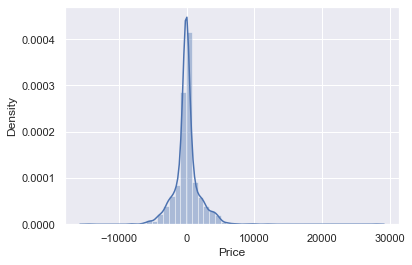

In [78]:
# Prediction using random forest regressor
# DecisionTree tend to overfit the data in this case
predict(RandomForestRegressor())

#### Hyperparameter Tuning

In [85]:
from sklearn.model_selection import RandomizedSearchCV

In [86]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [87]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [89]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
reg_rf=RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   7.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [90]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [91]:
#predicting the values
prediction = rf_random.predict(X_test)

<Figure size 576x576 with 0 Axes>

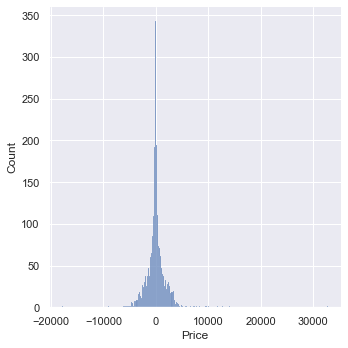

In [93]:
#distribution plot between actual value and predicted value
plt.figure(figsize = (8,8))
sns.displot(y_test-prediction)

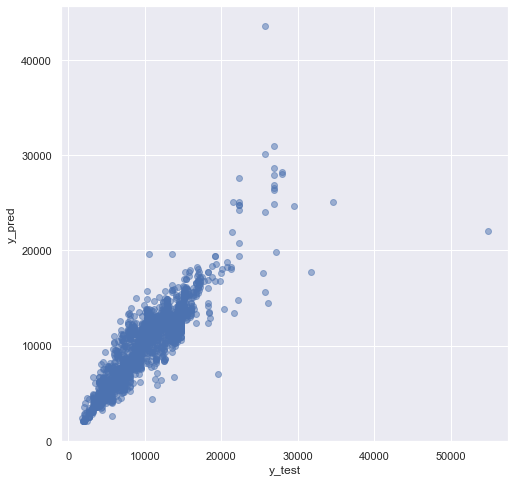

In [94]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [96]:
print('MAE:', mean_absolute_error(y_test, prediction))
print('MSE:', mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(mean_squared_error(y_test, prediction)))

MAE: 1125.9558776800254
MSE: 3537795.794240526
RMSE: 1880.902919940454


In [116]:

import pickle
# open a file, where you ant to store the data
file = open('flight_rf1.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [117]:
model = open('flight_rf1.pkl','rb')
forest = pickle.load(model)

In [125]:
y_prediction = forest.predict(X_test)

In [126]:
r2_score(y_test, y_prediction)

0.8314505476843198

In [123]:
X_test.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hr', 'Dep_min',
       'Arival_hr', 'Arival_min', 'Duration_hr', 'Duration_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Delhi', 'Kolkata', 'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Delhi',
       'Hyderabad', 'Kolkata', 'Kolkata', 'New Delhi'],
      dtype='object')

In [122]:
final_test_set.columns

Index(['Total_Stops', 'Journey_Day', 'Journey_month', 'Dep_hr', 'Dep_min',
       'Arival_hr', 'Arival_min', 'Duration_hr', 'Duration_min', 'Air India',
       'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
      dtype='object')